In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter

In [2]:
def decompose_homography(M):
    if M is None:
        return 0, 0, 0
    # Extract rotation matrix from homography matrix
    r1 = M[0:3, 0]
    r2 = M[0:3, 1]
    r3 = np.cross(r1, r2)
    R = np.column_stack((r1, r2, r3))

    # Singular value decomposition to ensure proper rotation matrix
    U, S, Vt = np.linalg.svd(R)
    R = np.dot(U, Vt)

    # Extract rotation angles from rotation matrix
    theta_x = np.arctan2(R[2, 1], R[2, 2])
    theta_y = np.arctan2(-R[2, 0], np.sqrt(R[2, 1] ** 2 + R[2, 2] ** 2))
    theta_z = np.arctan2(R[1, 0], R[0, 0])

    return theta_x, theta_y, theta_z

3360
(3360,)


Text(0.5, 1.0, 'rpm(t)')

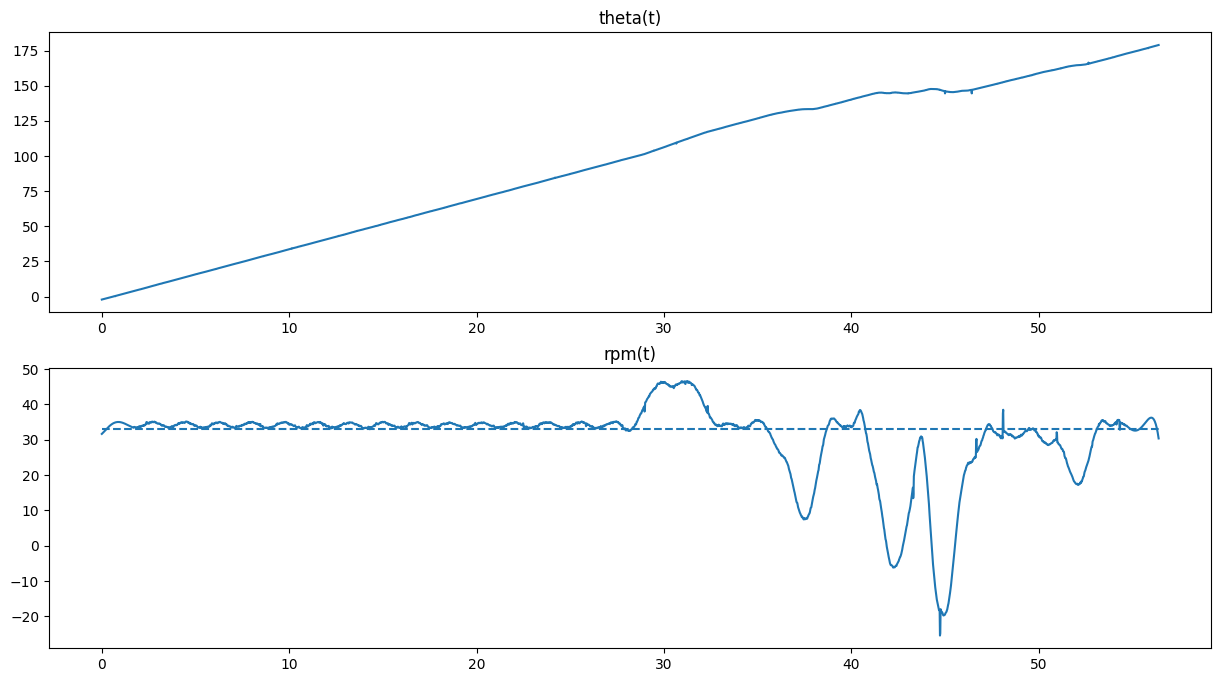

In [4]:
import pickle

FPS = 59.57
with open("matrices.pickle", "rb") as f:
    matrices = pickle.load(f)
print(len(matrices))
theta = np.array([decompose_homography(m) for m in matrices])[:, 2]
print(theta.shape)

theta = np.unwrap(theta, axis=0)
t = np.arange(theta.shape[0]) / FPS

# theta = savgol_filter(theta, window_length=20, polyorder=3)

omega = np.gradient(theta, 1 / FPS, edge_order=2)

omega = savgol_filter(omega, window_length=200, polyorder=5)


rpm = omega / np.pi * 30
plt.figure(figsize=(15, 8))
plt.subplot(2, 1, 1)
plt.plot(t, theta)
plt.title("theta(t)")
# plt.plot(t, smoothed_theta)
plt.subplot(2, 1, 2)
plt.plot(t, rpm)
plt.hlines(33, t[1], t[-1], linestyles="--")
plt.title("rpm(t)")

# plt.ylim(30, 50)